In [2]:
from IPython.core.debugger import set_trace



import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/VOO.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734 entries, 0 to 2733
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2734 non-null   object 
 1   Open       2734 non-null   float64
 2   High       2734 non-null   float64
 3   Low        2734 non-null   float64
 4   Close      2734 non-null   float64
 5   Adj Close  2734 non-null   float64
 6   Volume     2734 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 149.6+ KB


In [6]:
df.set_index("Date",drop = True,inplace = True)

In order to predict returns of the stock. now we will use only the close feature


In [7]:
df = df[['Close']]

In [10]:
type(df[['Close']])

pandas.core.frame.DataFrame

Here difference between 2 brackets and one bracket are, if i use single bracket then it will be as a series but if use 2 brackets then it will be a Data Frame. I want here it to be a dataframe,so i am using 2 brackets now

In [9]:
type(df['Close']) == type(df[['Close']])

False

In [11]:
df.describe()

,Close
count,2734.000000
mean,205.208277
std,69.685498
min,100.339996
25%,149.339996
50%,192.154999
75%,254.294999
max,401.820007


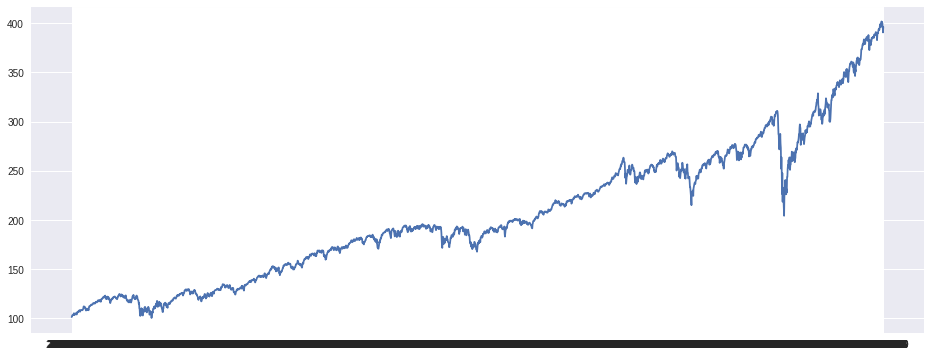

In [17]:
plt.figure(1, figsize=(16, 6))
_ = plt.plot(df.Close)


Calculate the percentage change.

The reason for using pct_change instead of the prices is the benefit of normalization as we can measure all variables in a comparable metric. Also returns have more manageable statistical properties than prices such as stationarity, as in most cases we don't have stationary prices but we can have stationary returns.

A stationary time series is one where statistical properties such as mean, variance, correlation, etc are constant over time. For more details on stationarity: https://en.wikipedia.org/wiki/Stationary_process

The method which we used to calculate returns is called percentage change

In [19]:
df['returns'] = df.Close.pct_change()

In [20]:
df.head()

,Close,returns
Date,,
2010-09-09,101.320000,NaN
2010-09-10,101.779999,0.004540
2010-09-13,103.059998,0.012576
2010-09-14,103.040001,-0.000194
2010-09-15,103.300003,0.002523


Just to show you the percent change,here the mechanism is 
(current value/previous value -1)

In [21]:
101.77/101.32 - 1

0.004441373864982223


Calculate the log returns,i attached a link below. Please refer the usage of log Returns

Why use log returns: https://quantivity.wordpress.com/2011/02/21/why-log-returns/

Here,i am using log returns because we assume log normality meaning that the price is normally distributed and also it is convient to use log return when returns ensures us the prices are close in Value to the raw returns

In [22]:
df['log_returns'] = np.log(1 + df['returns'])

In [26]:
df.head()

,Close,returns,log_returns
Date,,,
2010-09-09,101.320000,NaN,NaN
2010-09-10,101.779999,0.004540,0.004530
2010-09-13,103.059998,0.012576,0.012498
2010-09-14,103.040001,-0.000194,-0.000194
2010-09-15,103.300003,0.002523,0.002520


In [23]:
df['log_returns']

Date
2010-09-09         NaN
2010-09-10    0.004530
2010-09-13    0.012498
2010-09-14   -0.000194
2010-09-15    0.002520
                ...   
2021-07-14    0.001373
2021-07-15   -0.003222
2021-07-16   -0.007811
2021-07-19   -0.015065
2021-07-20    0.014030
Name: log_returns, Length: 2734, dtype: float64

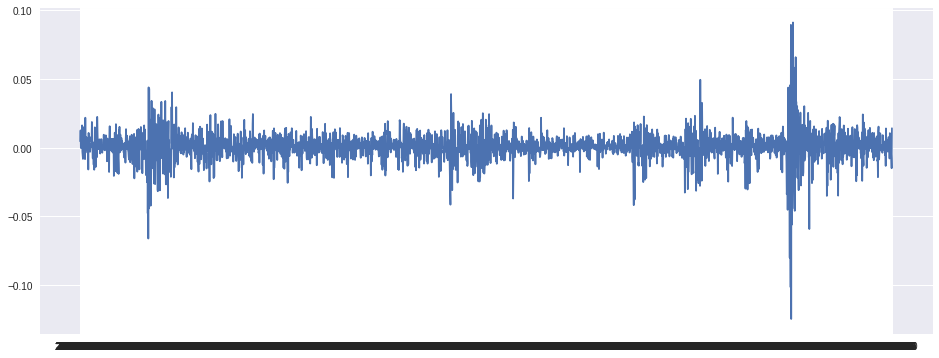

In [25]:
plt.figure(1,figsize= (16,6))
plt.plot(df.log_returns)

In [32]:
df.dropna(inplace = True)
X = df[['Close','returns','log_returns']].values

In [33]:
X

array([[ 1.01779999e+02,  4.54006119e-03,  4.52978620e-03],
       [ 1.03059998e+02,  1.25761349e-02,  1.24977122e-02],
       [ 1.03040001e+02, -1.94032606e-04, -1.94051433e-04],
       ...,
       [ 3.96609985e+02, -7.78048632e-03, -7.81091223e-03],
       [ 3.90679993e+02, -1.49516962e-02, -1.50645996e-02],
       [ 3.96200012e+02,  1.41292595e-02,  1.40303719e-02]])

**Here** i am using min max scalar because.The min-max scalar form of normalization uses the mean and standard deviation to box all the data into a range lying between a certain min and max value. For most purposes, the range is set between 0 and 1.

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scalar = MinMaxScaler(feature_range= (0,1)).fit(X)
X_scaled = scalar.transform(X)

In [36]:
X_scaled

array([[0.00477645, 0.57309982, 0.5991927 ],
       [0.00902216, 0.61087183, 0.63608869],
       [0.00895583, 0.55084813, 0.57731866],
       ...,
       [0.98271852, 0.51518947, 0.5420483 ],
       [0.96304891, 0.48148258, 0.50845963],
       [0.98135865, 0.618172  , 0.64318577]])

In [37]:
y = [x[0] for x in X_scaled]

Here i am implementing train test split


In [39]:
y = [x[0] for x in X_scaled]

In [41]:
y[:5]

[0.004776446024476244,
 0.009022163661789151,
 0.008955834222787007,
 0.009818252925564597,
 0.009685570828773749]

In [42]:
split = int(len(X_scaled) * 0.8)
print(split)

2186


In [43]:
X_train = X_scaled[:split]
X_test = X_scaled[split : len(X_scaled)]
y_train = y[:split]
y_test = y[split : len(y)]

Below i used assert becuase just to ensure X_train and y_train are equal and X_test and y_test are equal

In [44]:
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

Labeling
We want to predict the stock at a future price.We'll predict the stock price at (t+1) relative to the stock price at time t


As we're going to use an LSTM architecture, we know that it has memory and that it is maintained by setting the time step, basically how many steps in the past we want the LSTM to use.

The time step refers to how many steps in time we want the backpropagation algorithm to use when calculating gradients for weight updates during training.

So we can use a method to create both the timestep and the output variable, the t + 1.

In [47]:
n = 3 #time step of 3 it means we are using 3 days in a past
Xtrain = []
ytrain = []
Xtest = []
ytest = []


for i in range(n,len(X_train)): #here i intinated a for loop because it takes the values from past 3 days and  and appends to ytrain to get y train
  Xtrain.append(X_train[i - n : i, :X_train.shape[1]])
  ytrain.append(y_train[i]) #predicting the next record

for i in range(n,len(X_test)): #here i intinated a for loop because it takes the values from past 3 days and  and appends to ytrain to get y train
  Xtest.append(X_test[ i - n : i, : X_test.shape[1]])
  ytest.append(y_test[i]) #predicting the next record




In [48]:
df.head(5)

,Close,returns,log_returns
Date,,,
2010-09-10,101.779999,0.004540,0.004530
2010-09-13,103.059998,0.012576,0.012498
2010-09-14,103.040001,-0.000194,-0.000194
2010-09-15,103.300003,0.002523,0.002520
2010-09-16,103.260002,-0.000387,-0.000387


In [52]:
Xtrain[0]


array([[0.00477645, 0.57309982, 0.5991927 ],
       [0.00902216, 0.61087183, 0.63608869],
       [0.00895583, 0.55084813, 0.57731866]])

In [51]:
ytrain[0]

0.009818252925564597

In [53]:
val = np.array(ytrain[0])
val = np.c_[val , np.zeros(val.shape)]

In an LSTM network the input for each LSTM layer needs to contain the following information:
- The number of observations
- The time steps
- The features

Therefore we need to add a temporal dimension compared to a classical network:

(number of observations, number of steps, number of features per step)

In [63]:
Xtrain, ytrain = (np.array(Xtrain), np.array(ytrain))
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

Xtest, ytest = (np.array(Xtest), np.array(ytest))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [64]:
print(Xtrain.shape)
print(ytrain.shape)
print("---")
print(Xtest.shape)
print(ytest.shape)

(2183, 3, 3)
(2183,)
---
(544, 3, 3)
(544,)


In [69]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential

from keras.layers import LSTM,Dense

In [80]:
model = Sequential()
model.add(LSTM(4,input_shape = (Xtrain.shape[1],Xtrain.shape[2])))
model.add(Dense(1))
model.compile(loss = "mean_squared_error",optimizer = "adam")
model.fit(Xtrain,ytrain,epochs = 10,validation_data = (Xtest,ytest),batch_size = 16,verbose = 1)

Epoch 1/10
137/137 [==============================] - 3s 5ms/step - loss: 0.0136 - val_loss: 0.0575
Epoch 2/10
137/137 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.0189
Epoch 3/10
137/137 [==============================] - 0s 3ms/step - loss: 5.8615e-04 - val_loss: 0.0029
Epoch 4/10
137/137 [==============================] - 0s 3ms/step - loss: 4.6332e-05 - val_loss: 0.0017
Epoch 5/10
137/137 [==============================] - 0s 2ms/step - loss: 3.6623e-05 - val_loss: 0.0016
Epoch 6/10
137/137 [==============================] - 0s 3ms/step - loss: 3.6782e-05 - val_loss: 0.0017
Epoch 7/10
137/137 [==============================] - 0s 3ms/step - loss: 3.6385e-05 - val_loss: 0.0017
Epoch 8/10
137/137 [==============================] - 0s 2ms/step - loss: 3.6775e-05 - val_loss: 0.0016
Epoch 9/10
137/137 [==============================] - 0s 3ms/step - loss: 3.6544e-05 - val_loss: 0.0016
Epoch 10/10
137/137 [==============================] - 0s 3ms/step - los

In [81]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_8 (ModuleWrap (None, 4)                 128       
_________________________________________________________________
module_wrapper_9 (ModuleWrap (None, 1)                 5         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [82]:
trainPredict = model.predict(Xtrain)
testPredict = model.predict(Xtest)

In [83]:
trainPredict = np.c_[trainPredict , np.zeros(trainPredict.shape)]
testPredict = np.c_[testPredict,np.zeros(testPredict.shape)]

In [86]:
from sklearn.metrics import mean_squared_error

In [91]:
X_test[:5]

array([[0.5323073 , 0.51972234, 0.54654675],
       [0.53963778, 0.591587  , 0.61728785],
       [0.53724956, 0.53889383, 0.56552445],
       [0.52706643, 0.49674897, 0.52370267],
       [0.52855911, 0.55991936, 0.58624841]])

In [92]:
y_pred = model.predict(Xtest)

In [93]:
mean_squared_error(ytest,y_pred)

0.0017014325336272415